<a href="https://colab.research.google.com/github/hrithikthemen/Patient-Satisfaction-Prediction-using-Health-Information-Systems-Data/blob/main/Kaggle_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("datasetsatisfaction.csv")

# Display the first 10 rows
df.head(10)

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
3,2.0,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,1.0
4,3.0,4.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0,1.0
5,2.0,2.0,3.0,4.0,1.0,1.0,4.0,2.0,3.0,3.0,3.0,3.0,4.0,2.0,3.0,2.0,3.0
6,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,3.0
7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0
8,2.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0
9,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
# Drop missing values
df_clean = df.dropna()

# Define target and features
target = "satisfaction in RM"
features = [col for col in df_clean.columns if col != target]

X = df_clean[features]
y = df_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.5138900659940918
R² Score: 0.02892037193654573


RMSE shows how far off your model’s predictions are, on average.
R² tells how well the model explains the variation in satisfaction scores.

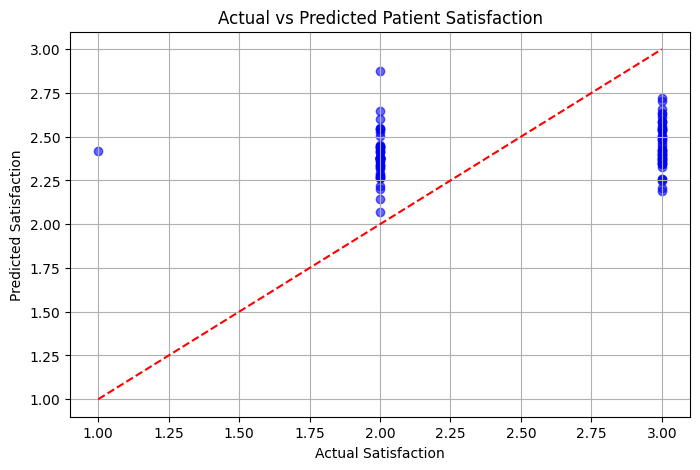

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title("Actual vs Predicted Patient Satisfaction")
plt.grid(True)
plt.show()


This plot helps you see if the model is predicting well:

- Points close to the red dashed line = accurate predictions.
- A wide spread away from the line = more error.